In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sms
from statsmodels.api import add_constant

In [2]:
df=pd.read_csv('quality.csv')

In [3]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
MemberID                131 non-null int64
InpatientDays           131 non-null int64
ERVisits                131 non-null int64
OfficeVisits            131 non-null int64
Narcotics               131 non-null int64
DaysSinceLastERVisit    131 non-null float64
Pain                    131 non-null int64
TotalVisits             131 non-null int64
ProviderCount           131 non-null int64
MedicalClaims           131 non-null int64
ClaimLines              131 non-null int64
StartedOnCombination    131 non-null bool
AcuteDrugGapSmall       131 non-null int64
PoorCare                131 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.5 KB


In [5]:
df.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


In [6]:
df['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [7]:
df.columns

Index(['MemberID', 'InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

In [8]:
baseline_model_accuracy=98/(98+33)
#The logistic model I am going to build should do better than this!

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


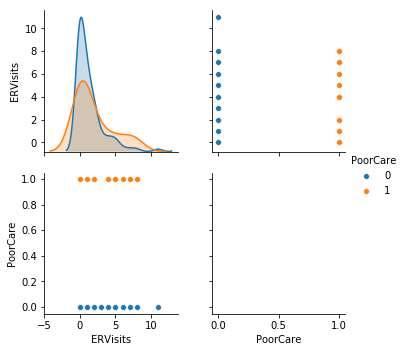

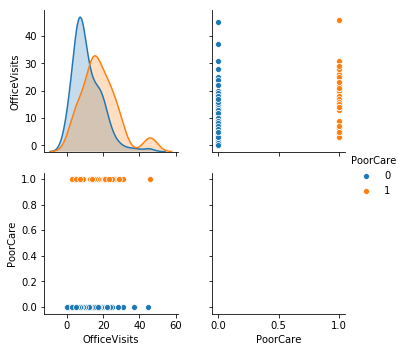

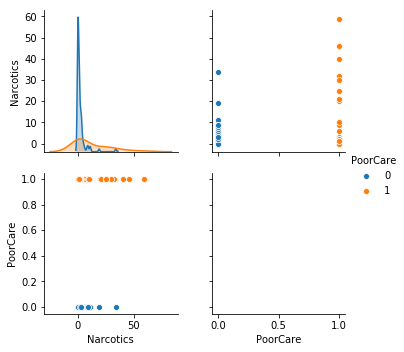

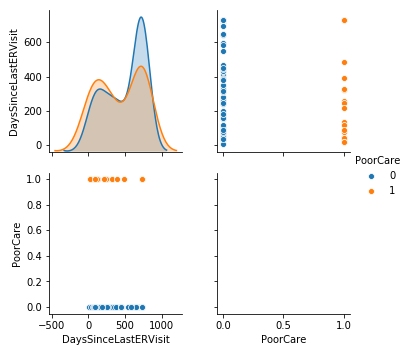

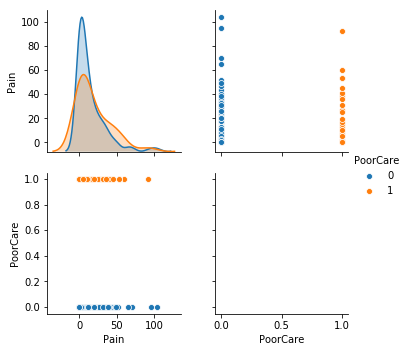

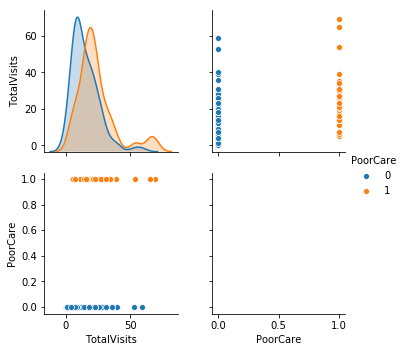

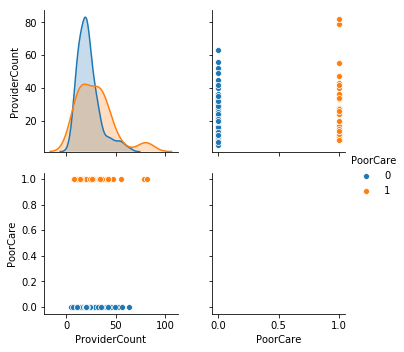

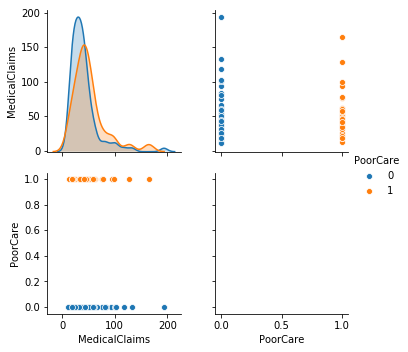

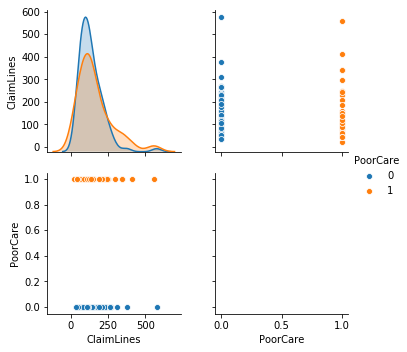

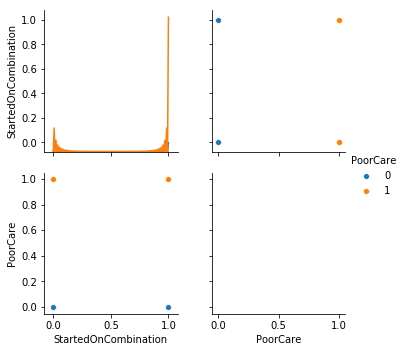

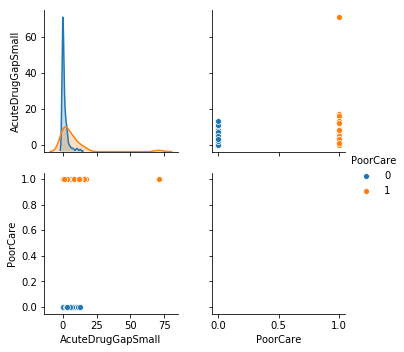

In [9]:
sns.pairplot(df[['ERVisits','PoorCare']],hue='PoorCare');
sns.pairplot(df[['OfficeVisits','PoorCare']],hue='PoorCare');
sns.pairplot(df[['Narcotics','PoorCare']],hue='PoorCare');
sns.pairplot(df[['DaysSinceLastERVisit','PoorCare']],hue='PoorCare');
sns.pairplot(df[['Pain','PoorCare']],hue='PoorCare');
sns.pairplot(df[['TotalVisits','PoorCare']],hue='PoorCare');
sns.pairplot(df[['ProviderCount','PoorCare']],hue='PoorCare');
sns.pairplot(df[['MedicalClaims','PoorCare']],hue='PoorCare');
sns.pairplot(df[['ClaimLines','PoorCare']],hue='PoorCare');
sns.pairplot(df[['StartedOnCombination','PoorCare']],hue='PoorCare');
sns.pairplot(df[['AcuteDrugGapSmall','PoorCare']],hue='PoorCare');

In [10]:
df.corr()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
MemberID,1.000000,-0.063620,-0.011032,-0.006273,0.203962,0.100174,0.023700,-0.032954,0.012511,-0.065212,-0.090459,-0.144841,0.196651,0.060916
InpatientDays,-0.063620,1.000000,0.440087,0.175901,-0.093769,-0.290121,0.304058,0.622036,0.244023,0.286378,0.386951,0.105626,-0.001144,0.080726
ERVisits,-0.011032,0.440087,1.000000,0.308526,-0.003732,-0.735246,0.546779,0.586439,0.457429,0.355319,0.542001,0.118766,-0.072750,0.135401
OfficeVisits,-0.006273,0.175901,0.308526,1.000000,0.275759,-0.128388,0.352968,0.865387,0.365469,0.498513,0.424953,0.164056,0.200735,0.329512
Narcotics,0.203962,-0.093769,-0.003732,0.275759,1.000000,0.065055,0.106860,0.163992,0.293478,0.220541,0.185799,0.043641,0.710889,0.447236
DaysSinceLastERVisit,0.100174,-0.290121,-0.735246,-0.128388,0.065055,1.000000,-0.358781,-0.344640,-0.297701,-0.198114,-0.412797,-0.061953,0.131085,-0.107983
Pain,0.023700,0.304058,0.546779,0.352968,0.106860,-0.358781,1.000000,0.482959,0.405095,0.296697,0.464713,0.078373,-0.031490,0.092168
TotalVisits,-0.032954,0.622036,0.586439,0.865387,0.163992,-0.344640,0.482959,1.000000,0.451545,0.549308,0.569619,0.185814,0.134861,0.300540
ProviderCount,0.012511,0.244023,0.457429,0.365469,0.293478,-0.297701,0.405095,0.451545,1.000000,0.517002,0.605357,0.155765,0.141284,0.220166
MedicalClaims,-0.065212,0.286378,0.355319,0.498513,0.220541,-0.198114,0.296697,0.549308,0.517002,1.000000,0.813935,0.067931,0.085637,0.167399


In [11]:
pd.crosstab(df['PoorCare'],df['StartedOnCombination'])

StartedOnCombination,False,True
PoorCare,,
0,97,1
1,28,5


In [12]:
temp=pd.get_dummies(df['StartedOnCombination'],drop_first=True)

In [13]:
df_final=pd.concat([df,temp],axis=1)

In [14]:
df_final=df_final.drop(['StartedOnCombination'],axis=1)

In [15]:
df_final.head()
df_final.columns

Index([            'MemberID',        'InpatientDays',             'ERVisits',
               'OfficeVisits',            'Narcotics', 'DaysSinceLastERVisit',
                       'Pain',          'TotalVisits',        'ProviderCount',
              'MedicalClaims',           'ClaimLines',    'AcuteDrugGapSmall',
                   'PoorCare',                   True],
      dtype='object')

In [16]:
log_reg=LogisticRegression(C=1e9)

In [17]:
X_train, X_test, y_train, y_test =train_test_split(df_final[['InpatientDays','ERVisits','OfficeVisits','Narcotics','DaysSinceLastERVisit','Pain','TotalVisits','ProviderCount','MedicalClaims','AcuteDrugGapSmall',True]],df_final['PoorCare'],test_size=0.3,random_state=1)

In [18]:
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [19]:
pred_train=log_reg.predict(X_train)

In [20]:
pd.crosstab(y_train,pred_train)

col_0,0,1
PoorCare,,
0,69,2
1,10,10


In [21]:
accuracy1=(69+10)/len(y_train)

In [22]:
accuracy1

0.8681318681318682

In [23]:
pred_test=log_reg.predict(X_test)

In [24]:
pd.crosstab(y_test,pred_test)

col_0,0,1
PoorCare,,
0,22,5
1,7,6


In [25]:
accuracy2=(22+6)/len(y_test)

In [26]:
accuracy2

0.7

In [27]:
X2=add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
logit=sms.Logit(y_train,X2)

In [29]:
result=logit.fit()

         Current function value: 0.326526
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.3800
Time:                        09:05:16   Log-Likelihood:                -29.714
converged:                      False   LL-Null:                       -47.923
                                        LLR p-value:                 7.130e-05
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9094      1.444     -1.323      0.186      -4.739       0.920
InpatientDays            0.0221        nan        nan        nan         nan         nan
ERVisits    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [31]:
X_train, X_test, y_train, y_test =train_test_split(df_final[['Narcotics','DaysSinceLastERVisit','AcuteDrugGapSmall',True]],df_final['PoorCare'],test_size=0.3,random_state=1)

In [32]:
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred_train_2=log_reg.predict(X_train)

In [34]:
pd.crosstab(y_train,pred_train_2)

col_0,0,1
PoorCare,,
0,68,3
1,11,9


In [35]:
accuracy_train_2=(68+9)/len(y_train)

In [36]:
accuracy_train_2

0.8461538461538461

In [37]:
pred_test_2=log_reg.predict(X_test)

In [38]:
pd.crosstab(y_test,pred_test_2)

col_0,0,1
PoorCare,,
0,26,1
1,8,5


In [39]:
accuracy_test_2=(26+5)/len(y_test)

In [40]:
accuracy_test_2

0.775

In [41]:
X2=add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
logit=sms.Logit(y_train,X2)

In [43]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.370455
         Iterations 7


In [44]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.2966
Time:                        09:05:16   Log-Likelihood:                -33.711
converged:                       True   LL-Null:                       -47.923
                                        LLR p-value:                 1.023e-05
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3805      0.556     -2.485      0.013      -2.469      -0.291
Narcotics                0.1001      0.043      2.311      0.021       0.015       0.185
DaysSinceLas

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_final[["DaysSinceLastERVisit","Narcotics",True]],df_final['PoorCare'],test_size=0.3,random_state=1)

In [46]:
log_reg=LogisticRegression(C = 1e9)
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [47]:
pred_train_3=log_reg.predict(X_train)
pd.crosstab(y_train,pred_train_3)

col_0,0,1
PoorCare,,
0,70,1
1,11,9


In [48]:
accuracy_train_3=(70+9)/len(y_train)

In [49]:
accuracy_train_3

0.8681318681318682

In [50]:
pred_test_3=log_reg.predict(X_test)

In [51]:
pd.crosstab(y_test,pred_test_3)

col_0,0,1
PoorCare,,
0,27,0
1,8,5


In [52]:
accuracy_test_3=(27+5)/len(y_test)

In [53]:
accuracy_test_3

0.8

In [54]:
sensitivity=(70)/71

In [55]:
sensitivity

0.9859154929577465

In [56]:
specificity=27/(27+8)

In [57]:
specificity

0.7714285714285715

In [58]:
baseline_model_accuracy

0.7480916030534351

In [59]:
X2=add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
logit=sms.Logit(y_train,X2)

In [61]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.391254
         Iterations 6


In [62]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.2571
Time:                        09:05:16   Log-Likelihood:                -35.604
converged:                       True   LL-Null:                       -47.923
                                        LLR p-value:                 1.838e-05
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2078      0.531     -2.273      0.023      -2.249      -0.166
DaysSinceLastERVisit    -0.0019      0.001     -1.729      0.084      -0.004       0.000
Narcotics   

In [63]:
print('Intercept is:',log_reg.intercept_)

Intercept is: [-1.19928704]


In [64]:
print('Coefficients are:',log_reg.coef_)

Coefficients are: [[-1.93095751e-03  1.26656947e-01  2.21971696e+00]]


In [65]:
error_test=8/len(y_test)

In [66]:
error_test

0.2

In [67]:
pred_test_probablity=log_reg.predict_proba(X_test)

In [68]:
pred_test_probablity

array([[0.93155451, 0.06844549],
       [0.93155451, 0.06844549],
       [0.60079948, 0.39920052],
       [0.91352877, 0.08647123],
       [0.78086811, 0.21913189],
       [0.90298551, 0.09701449],
       [0.8813506 , 0.1186494 ],
       [0.89992278, 0.10007722],
       [0.76922409, 0.23077591],
       [0.92302389, 0.07697611],
       [0.84246193, 0.15753807],
       [0.85116106, 0.14883894],
       [0.81319482, 0.18680518],
       [0.72648641, 0.27351359],
       [0.80457152, 0.19542848],
       [0.93155451, 0.06844549],
       [0.71103507, 0.28896493],
       [0.36456459, 0.63543541],
       [0.91779173, 0.08220827],
       [0.84373908, 0.15626092],
       [0.55659834, 0.44340166],
       [0.59654748, 0.40345252],
       [0.93155451, 0.06844549],
       [0.04261552, 0.95738448],
       [0.93155451, 0.06844549],
       [0.85523752, 0.14476248],
       [0.36456459, 0.63543541],
       [0.83167728, 0.16832272],
       [0.72037459, 0.27962541],
       [0.55090675, 0.44909325],
       [0.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(-0.05, 1.05)

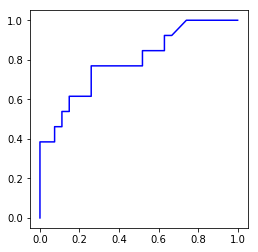

In [69]:
fpr, tpr, threshold= metrics.roc_curve(y_test, pred_test_probablity[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [70]:
AUC= metrics.auc(fpr,tpr)

In [71]:
AUC

0.792022792022792

In [72]:
pred_test_probablity[:,1]

array([0.06844549, 0.06844549, 0.39920052, 0.08647123, 0.21913189,
       0.09701449, 0.1186494 , 0.10007722, 0.23077591, 0.07697611,
       0.15753807, 0.14883894, 0.18680518, 0.27351359, 0.19542848,
       0.06844549, 0.28896493, 0.63543541, 0.08220827, 0.15626092,
       0.44340166, 0.40345252, 0.06844549, 0.95738448, 0.06844549,
       0.14476248, 0.63543541, 0.16832272, 0.27962541, 0.44909325,
       0.13898181, 0.09701449, 0.07697611, 0.07697611, 0.06844549,
       0.72785003, 0.06844549, 0.20355778, 0.17667268, 0.63543541])

In [73]:
x=[]
for i in range(len(pred_test_probablity[:,1])):
    if (pred_test_probablity[:,1][i]>=0.4):
        x.append(1)
    else:
        x.append(0)
x=np.array(x)
pd.crosstab(y_test,x)

col_0,0,1
PoorCare,,
0,25,2
1,7,6


In [74]:
(25+6)/(25+2+7+6)

0.775

In [75]:
X_train.head()

,DaysSinceLastERVisit,Narcotics,True
48,718.0,0,0
124,731.0,0,0
53,72.0,0,0
51,716.0,0,0
112,349.0,0,0


In [76]:
df_final.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare,True
0,1,0,0,18,1,731.0,10,18,21,93,222,0,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,1,0,0
2,3,0,0,5,3,731.0,10,5,16,27,148,5,0,0
3,4,0,1,19,0,158.0,34,20,14,59,242,0,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,0,0,0


In [ ]:
InpatientDays            0.0221        nan        nan        nan         nan         nan
ERVisits                -0.1902        nan        nan        nan         nan         nan
OfficeVisits             0.1548        nan        nan        nan         nan         nan
Narcotics                0.1010      0.050      2.036      0.042       0.004       0.198
DaysSinceLastERVisit    -0.0040      0.002     -1.941      0.052      -0.008    3.95e-05
Pain                    -0.0406      0.027     -1.506      0.132      -0.093       0.012
TotalVisits             -0.0132        nan        nan        nan         nan         nan

In [77]:
df_final['InpatientDays'].isnull().sum()

0

In [78]:
df_final['ERVisits'].isnull().sum()

0

In [79]:
df_final['OfficeVisits'].isnull().sum()

0

In [80]:
df_final['TotalVisits'].isnull().sum()

0

In [81]:
df_final.corr()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare,True
MemberID,1.000000,-0.063620,-0.011032,-0.006273,0.203962,0.100174,0.023700,-0.032954,0.012511,-0.065212,-0.090459,0.196651,0.060916,-0.144841
InpatientDays,-0.063620,1.000000,0.440087,0.175901,-0.093769,-0.290121,0.304058,0.622036,0.244023,0.286378,0.386951,-0.001144,0.080726,0.105626
ERVisits,-0.011032,0.440087,1.000000,0.308526,-0.003732,-0.735246,0.546779,0.586439,0.457429,0.355319,0.542001,-0.072750,0.135401,0.118766
OfficeVisits,-0.006273,0.175901,0.308526,1.000000,0.275759,-0.128388,0.352968,0.865387,0.365469,0.498513,0.424953,0.200735,0.329512,0.164056
Narcotics,0.203962,-0.093769,-0.003732,0.275759,1.000000,0.065055,0.106860,0.163992,0.293478,0.220541,0.185799,0.710889,0.447236,0.043641
DaysSinceLastERVisit,0.100174,-0.290121,-0.735246,-0.128388,0.065055,1.000000,-0.358781,-0.344640,-0.297701,-0.198114,-0.412797,0.131085,-0.107983,-0.061953
Pain,0.023700,0.304058,0.546779,0.352968,0.106860,-0.358781,1.000000,0.482959,0.405095,0.296697,0.464713,-0.031490,0.092168,0.078373
TotalVisits,-0.032954,0.622036,0.586439,0.865387,0.163992,-0.344640,0.482959,1.000000,0.451545,0.549308,0.569619,0.134861,0.300540,0.185814
ProviderCount,0.012511,0.244023,0.457429,0.365469,0.293478,-0.297701,0.405095,0.451545,1.000000,0.517002,0.605357,0.141284,0.220166,0.155765
MedicalClaims,-0.065212,0.286378,0.355319,0.498513,0.220541,-0.198114,0.296697,0.549308,0.517002,1.000000,0.813935,0.085637,0.167399,0.067931
